In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
features = pd.read_csv('C:/Users/divya/Retail Data/features.csv')
sales = pd.read_csv('C:/Users/divya/Retail Data/sales.csv')
stores = pd.read_csv('C:/Users/divya/Retail Data/stores.csv')

In [11]:
stores.shapeprint(features.shape)
print(sales.shape)
print(stores.shape)

(8190, 12)
(421570, 5)
(45, 3)


In [12]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [14]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [104]:
df = sales.merge(features, how = 'left', on = ['Store','Date','IsHoliday'])
df = df.merge(stores, how = 'left', on = ['Store'])

In [105]:
df.shape

(421570, 16)

In [106]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [107]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [108]:
#check missing data
total = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum())/(df.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'])
missing_data

,Total,Percent
MarkDown2,310322,73.611025
MarkDown4,286603,67.984676
MarkDown3,284479,67.480845
MarkDown1,270889,64.257181
MarkDown5,270138,64.079038
Size,0,0.000000
Type,0,0.000000
Unemployment,0,0.000000
CPI,0,0.000000
Fuel_Price,0,0.000000


In [109]:
df = df.fillna(0)

In [110]:
def date_transform(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['DayofWeek'] = df['Date'].dt.weekday
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    return df

In [111]:
df = date_transform(df)

In [112]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Day,DayofWeek,Month,Year
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2,6,5,2010
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2,3,12,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,19,4,2,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,26,4,2,2010
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,3,0,5,2010


In [156]:
distinct_dept_count = df[['Store','Dept']].groupby(['Store'])['Dept'].nunique()
distinct_dept_count.head()

Store
1    77
2    78
3    72
4    78
5    72
Name: Dept, dtype: int64

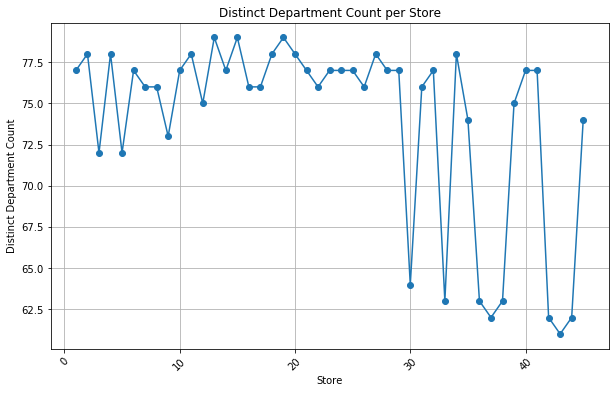

In [137]:
plt.figure(figsize=(10,6))
distinct_dept_count.plot(kind='line',marker = 'o')

plt.xlabel('Store')
plt.ylabel('Distinct Department Count')
plt.title('Distinct Department Count per Store')
plt.xticks(rotation = 45)
plt.grid(visible = True)

In [177]:
avg_sales_store_monthly = df[['Year','Month','Weekly_Sales']].groupby(['Year','Month']).agg({'Weekly_Sales':'mean'}).reset_index()
avg_sales_store_monthly.head()

,Year,Month,Weekly_Sales
0,2010,1,14391.780535
1,2010,2,16244.436211
2,2010,3,15828.833079
3,2010,4,15701.015586
4,2010,5,15971.989499


In [178]:
pivot_df = avg_sales_store_monthly.pivot(index='Month', columns='Year', values='Weekly_Sales')
pivot_df.head()

Year,2010,2011,2012
Month,,,
1,14391.780535,14471.611234,14570.279140
2,16244.436211,15872.183056,15944.362413
3,15828.833079,15490.811225,15558.979707
4,15701.015586,15762.759190,15390.168452
5,15971.989499,15524.557693,16040.929182


C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\divya\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


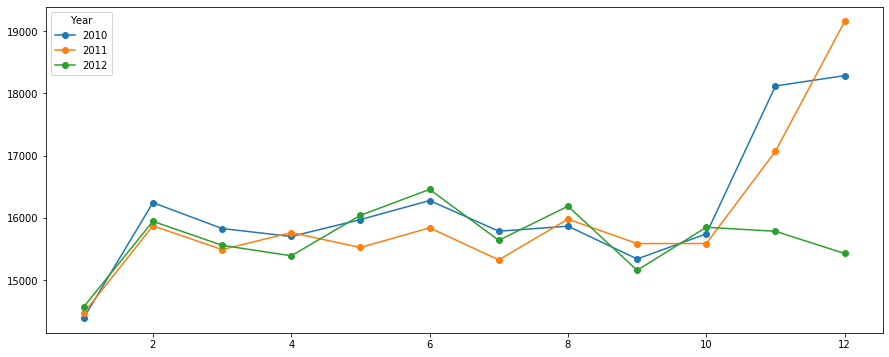

In [179]:
plt.figure(figsize=(15,6))
for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], marker = 'o', label = f'{year}')
plt.legend(title = 'Year')